# Exploratory Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

from acquire import get_iris_data

**1. Split data into train (70%) & test (30%) samples.**

In [2]:
df = get_iris_data()
df = df.drop(columns = ['species_id', 'measurement_id'])
df= df.rename(columns = {'species_name': 'species'})

In [3]:
train, test = train_test_split(df,train_size = .7, random_state = 123)
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
136,6.3,3.4,5.6,2.4,virginica
53,5.5,2.3,4.0,1.3,versicolor
19,5.1,3.8,1.5,0.3,setosa
38,4.4,3.0,1.3,0.2,setosa


In [4]:
train.shape, test.shape

((105, 5), (45, 5))

**2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.**

In [5]:
train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
subset = train[[ 'species', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width']]
subset.head()

,species,sepal_length,sepal_width,petal_length,petal_width
114,virginica,5.8,2.8,5.1,2.4
136,virginica,6.3,3.4,5.6,2.4
53,versicolor,5.5,2.3,4.0,1.3
19,setosa,5.1,3.8,1.5,0.3
38,setosa,4.4,3.0,1.3,0.2


In [7]:
melt = pd.melt(subset, "species", var_name="measurement")
melt.head()

,species,measurement,value
0,virginica,sepal_length,5.8
1,virginica,sepal_length,6.3
2,versicolor,sepal_length,5.5
3,setosa,sepal_length,5.1
4,setosa,sepal_length,4.4


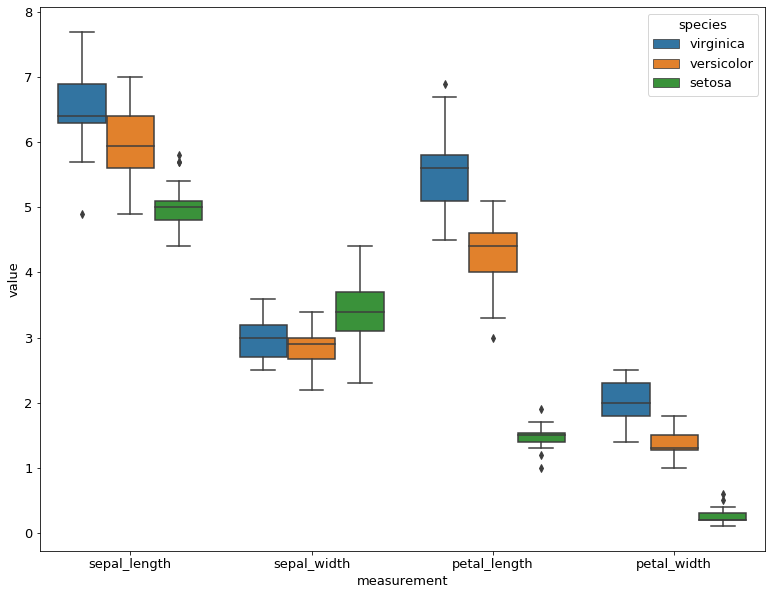

In [8]:
plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=13)
sns.boxplot(data = melt, y='value', x='measurement', hue='species')

Takeaways:
- virginica has the highest average in sepal_length, petal_length and petal_width
- setosa has the lowest values in above categories

**3. Create 4 subplots (2 rows x 2 columns) of scatterplots**

- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length
- Make your figure size 14 x 8. What are your takeaways?

[Text(0, 0.5, 'petal_length')]

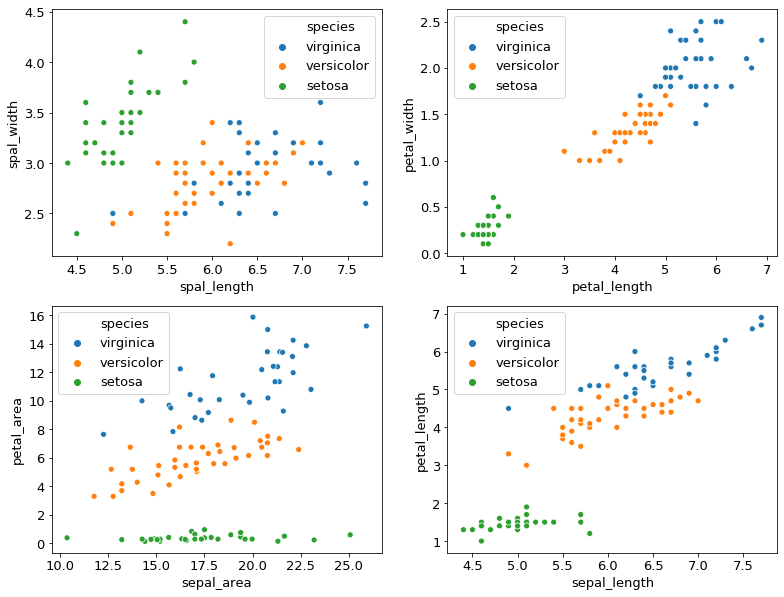

In [9]:
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2)

sns.scatterplot(train.sepal_length, train.sepal_width, ax=ax1, hue = train.species)
ax1.set(xlabel ='spal_length')
ax1.set(ylabel ='spal_width')

sns.scatterplot(train.petal_length, train.petal_width,ax=ax2, hue = train.species)
ax2.set(xlabel ='petal_length')
ax2.set(ylabel ='petal_width')

sns.scatterplot(train.sepal_length*train.sepal_width ,train.petal_width * train.petal_length,
               ax=ax3, hue = train.species)
ax3.set(xlabel ='sepal_area')
ax3.set(ylabel ='petal_area')

sns.scatterplot(train.sepal_length, train.petal_length,ax=ax4, hue = train.species)
ax4.set(xlabel ='sepal_length')
ax4.set(ylabel ='petal_length')

Takeaway:
- petal_length and petal_with have some linear relationship
- sepla_length and petal_length also have somewhat linear relationship
- There are obvious grouping in different species 

**4. Create a heatmap of each variable layering correlation coefficient on top.**

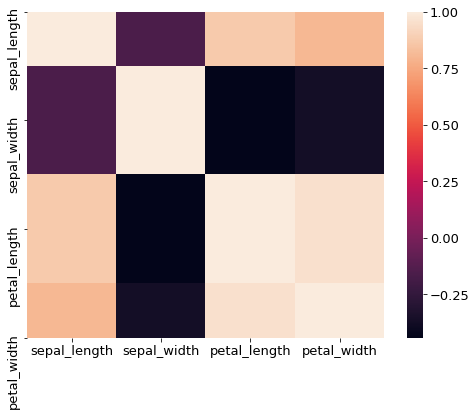

In [10]:
plt.figure(figsize = (8,6))
sns.heatmap(train.corr())

**5. Create a scatter matrix visualizing the interaction of each variable**

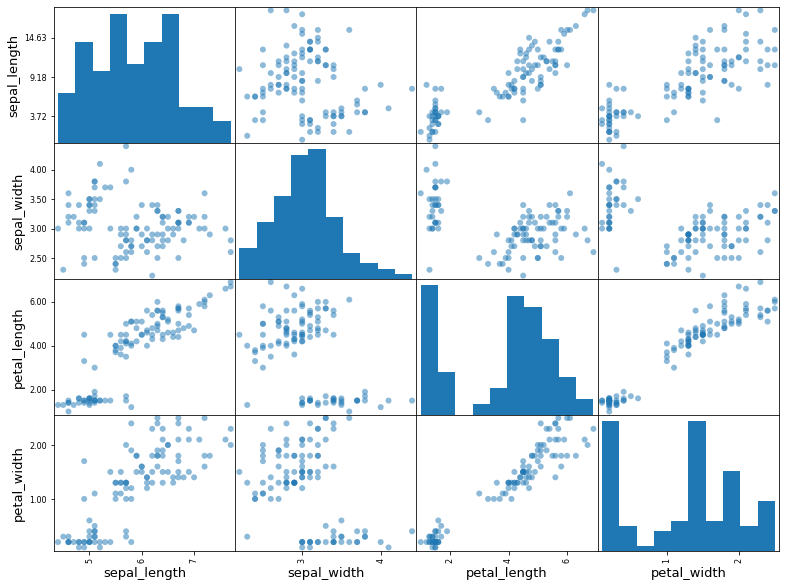

In [11]:
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

axes = pd.plotting.scatter_matrix(
    train[['sepal_length','sepal_width','petal_length','petal_width']], marker='o')
for ax in axes.flatten():
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

**6. Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.**

- must include null hypothesis, alternative hypothesis, t-test, results, summary
- $H_0$: the difference in sepal length between virginica and versicolor is insignificant.
- $H_a$: the difference in sepal length between virginica and versicolor is substantial.
- We will test if the sepal length of virginica is significantly different than that of the versicolor.
- If there is difference, then variable `sepal_length` is a good choice to keep as a feature.
- We can use a t-test here, as `sepal_length` is somewhat normally distributed.

In [12]:
from scipy import stats

In [13]:
x1 = train[train.species == 'virginica'].sepal_length
x2 = train[train.species == 'versicolor'].sepal_length
t, p = stats.ttest_ind(x1,x2)
p

6.811720108343317e-05

Conclusion: becasue p value is extremly small, we can reject null hypothesis. There are substantial difference between sepal length between virginica and versicolor

(array([ 7., 14., 10., 18., 11., 14., 18.,  5.,  5.,  3.]),
 array([4.4 , 4.73, 5.06, 5.39, 5.72, 6.05, 6.38, 6.71, 7.04, 7.37, 7.7 ]),
 <a list of 10 Patch objects>)

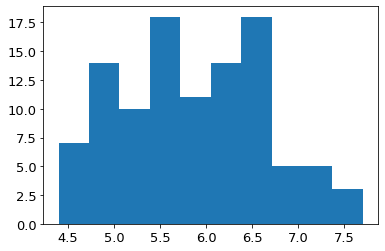

In [14]:
# Check the distribution of the sepal_lenght.
plt.figure(figsize = (6, 4))
plt.hist(train.sepal_length)
